In [ ]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#!pip install wordcloud
from wordcloud import WordCloud
#!pip install textblob
from textblob import TextBlob
!python -m textblob.download_corpora

import nltk
nltk.download('punkt')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
#Import data
from google.colab import drive
drive.mount('/content/drive')

#Define file path and read the file
file_path = "/content/drive/My Drive/DisneylandReviews.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

Mounted at /content/drive


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


#Exploratory Data Analysis

In [ ]:
#Unique values for each column
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values in 'Review_ID':
[670772142 670682799 670623270 ...   1645894   1618637   1536786]
----------------------------------------
Unique values in 'Rating':
[4 3 5 2 1]
----------------------------------------
Unique values in 'Year_Month':
['2019-4' '2019-5' '2019-3' '2018-9' '2019-1' '2018-11' '2018-12' '2018-6'
 '2019-2' '2018-10' '2018-8' '2018-5' '2018-4' '2018-7' '2018-3' '2018-2'
 'missing' '2018-1' '2017-12' '2017-11' '2017-6' '2017-10' '2017-9'
 '2017-8' '2017-7' '2017-5' '2017-4' '2017-3' '2017-2' '2017-1' '2016-12'
 '2016-11' '2016-10' '2016-9' '2016-8' '2016-7' '2016-6' '2016-5' '2016-4'
 '2016-3' '2016-2' '2016-1' '2015-12' '2015-11' '2015-10' '2015-9'
 '2015-8' '2015-7' '2015-6' '2015-5' '2015-4' '2015-3' '2015-2' '2015-1'
 '2014-12' '2014-11' '2014-10' '2014-9' '2014-8' '2014-7' '2014-6'
 '2014-5' '2014-4' '2014-3' '2014-2' '2014-1' '2013-12' '2013-11'
 '2013-10' '2013-9' '2013-8' '2013-7' '2013-6' '2013-5' '2013-4' '2013-3'
 '2013-2' '2013-1' '2012-12' '2012-11' 

In [ ]:
#NA values
df.isna().sum()

,0
Review_ID,0
Rating,0
Year_Month,0
Reviewer_Location,0
Review_Text,0
Branch,0


##Rating (Histogram)

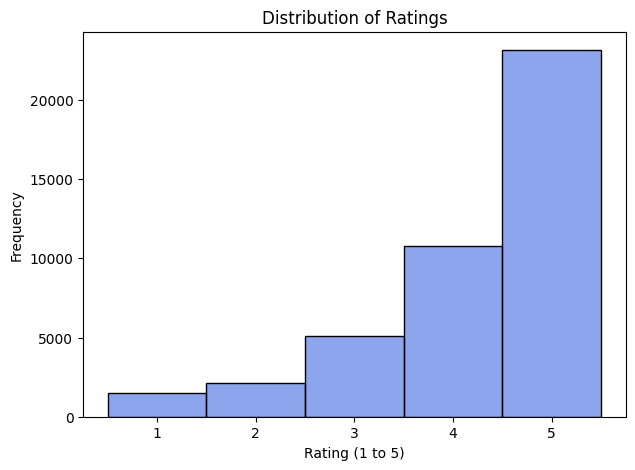

In [ ]:
#Histogram plot for Ratings
plt.figure(figsize=(7, 5))
sns.histplot(df['Rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], alpha=0.6, color="royalblue")
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel("Rating (1 to 5)")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.show()

##Disneyland Branch (Histogram)

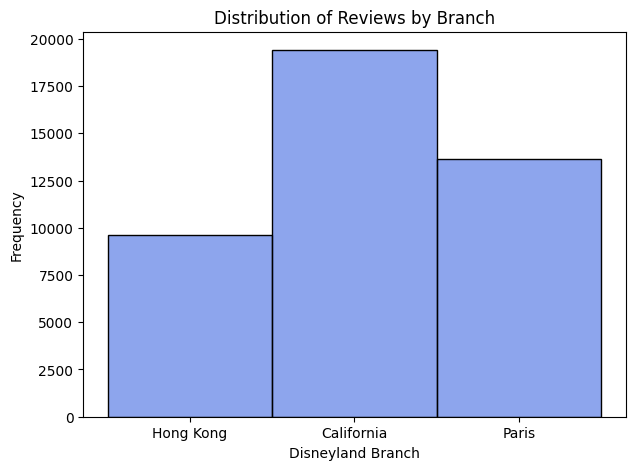

In [ ]:
#Histogram plot for Disneyland Branches
plt.figure(figsize=(7, 5))
sns.histplot(df['Branch'], discrete=True, alpha=0.6, color="royalblue")
plt.xticks(ticks=range(3), labels=["Hong Kong", "California", "Paris"])
plt.xlabel("Disneyland Branch")
plt.ylabel("Frequency")
plt.title("Distribution of Reviews by Branch")
plt.show()

##Year Month (Line plot)

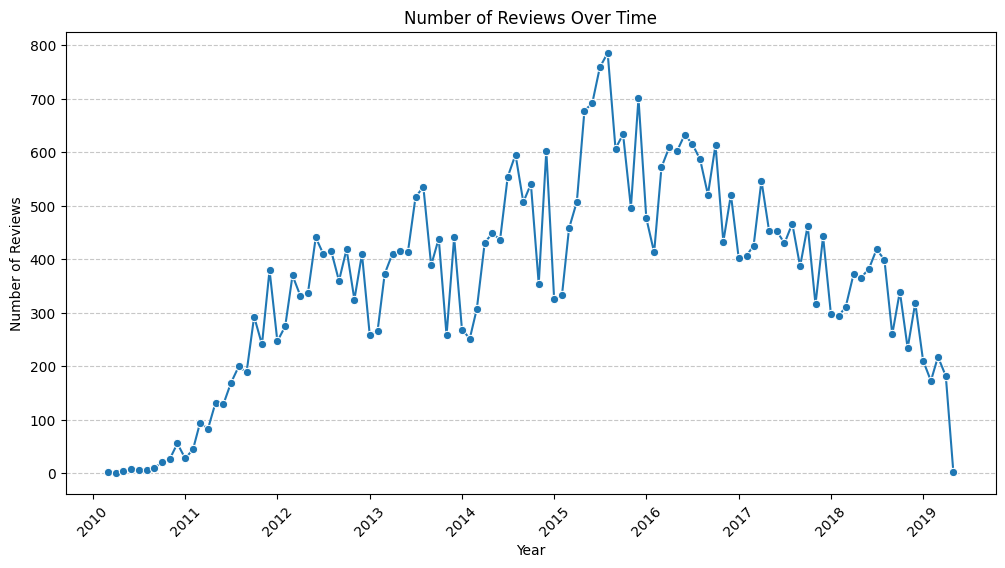

In [ ]:
#Line chart for Year_Month trends
df['Year_Month'] = pd.to_datetime(df['Year_Month'], errors='coerce')
df_dropna_ym = df.dropna(subset=['Year_Month'])  # Remove missing values

df_grouped = df_dropna_ym.groupby('Year_Month').size().reset_index(name='Review_Count') # group by Year_Month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='Review_Count', data=df_grouped, marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews Over Time")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Reviewer Location (Line plot)

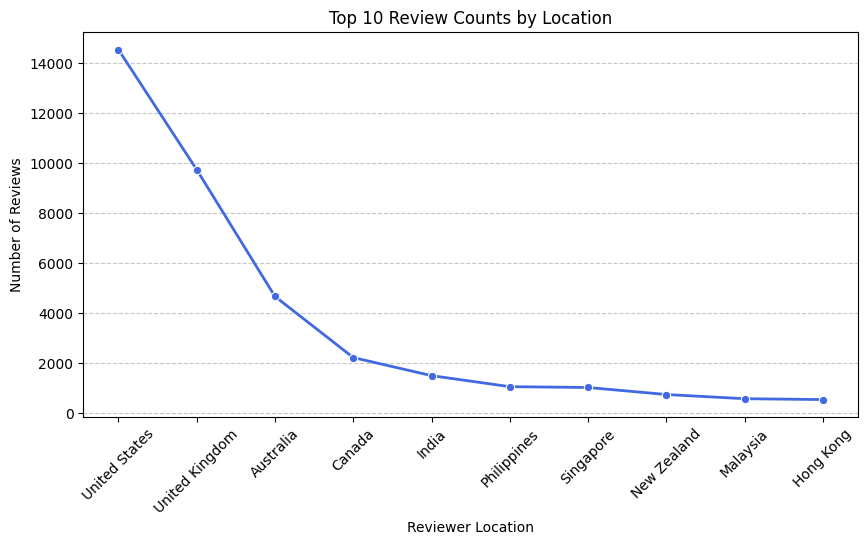

In [ ]:
#Line plot for Reviewer_Location (Top 10)
df_location = df.groupby('Reviewer_Location').size().reset_index(name='Review_Count')
df_top10 = df_location.nlargest(10, 'Review_Count')

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_top10['Reviewer_Location'], y=df_top10['Review_Count'], marker="o", linewidth=2, color="royalblue")
plt.xticks(rotation=45)
plt.xlabel("Reviewer Location")
plt.ylabel("Number of Reviews")
plt.title("Top 10 Review Counts by Location")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Word Cloud Grouped by Rating

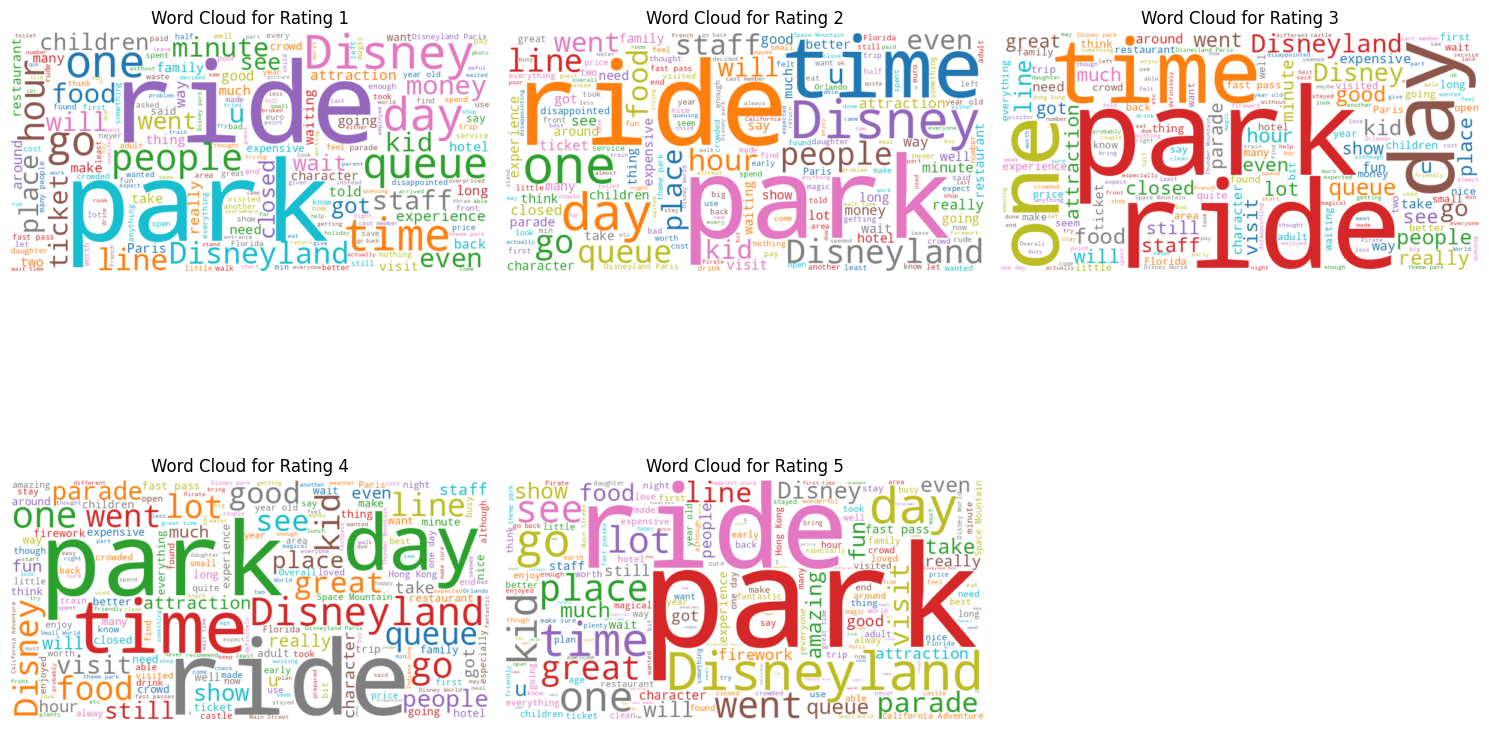

In [ ]:
#Word cloud
plt.figure(figsize=(15, 10))

for rating in sorted(df['Rating'].dropna().unique()):
    plt.subplot(2, 3, int(rating))
    text = " ".join(df[df['Rating'] == rating]['Review_Text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="tab10", collocations=True).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Rating {int(rating)}")

plt.tight_layout()
plt.show()